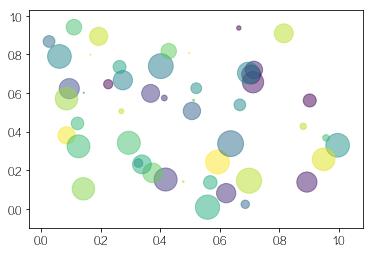

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2
plt.scatter(x,y,s = area, c = colors, alpha=0.5)
plt.show()

In [6]:
from pyecharts import Geo

data = [
    ("海门", 9),("鄂尔多斯", 12),("招远", 12),("舟山", 12),("齐齐哈尔", 14),("盐城", 15),
    ("赤峰", 16),("青岛", 18),("乳山", 18),("金昌", 19),("泉州", 21),("莱西", 21),
    ("日照", 21),("胶南", 22),("南通", 23),("拉萨", 24),("云浮", 24),("梅州", 25)]
geo = Geo("全国主要城市空气质量", "data from pm2.5", title_color="#fff", title_pos="center",
width=1200, height=600, background_color='#404a59')
attr, value = geo.cast(data)
geo.add("", attr, value, visual_range=[0, 200], visual_text_color="#fff", symbol_size=15, is_visualmap=True)
geo.show_config()
geo.render()

{
    "legend": [
        {
            "textStyle": {
                "color": "#333",
                "fontSize": 12
            },
            "show": true,
            "selectedMode": "multiple",
            "top": "top",
            "data": [
                ""
            ],
            "left": "center",
            "orient": "horizontal"
        }
    ],
    "toolbox": {
        "feature": {
            "restore": {
                "show": true
            },
            "saveAsImage": {
                "show": true,
                "title": "\u4e0b\u8f7d\u56fe\u7247"
            },
            "dataView": {
                "show": true
            }
        },
        "show": true,
        "left": "95%",
        "orient": "vertical",
        "top": "center"
    },
    "tooltip": {
        "textStyle": {
            "color": "#fff",
            "fontSize": 14
        },
        "formatter": "{b}: {c}",
        "triggerOn": "mousemove|click",
        "borderWidth": 0,
        "ba